# Adaline Converting Celsius to Fahrenheit

* Training an Adaline model (single layer neural network) to learn how to convert temperature degrees from Celsius to Fahrenheit;
* Dataset has 30 instances with 1 independent variable (degrees Celsius) and 1 dependent variable (degrees Fahrenheit);
* Linear correlation between Celsius and Fahrenheit can be easily represented by an Adaline;
* The Adaline model coefficients are fit to be exactly like the formula to convert Celsius to Fahrenheit.

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## Data Exploration

Our objective is to train an Adaline model to learn how to convert degrees Celsius to degrees Fahrenheit. Therefore, we need a dataset having 2 attributes only. 1 attribute indicating the temperature in Celsius and 1 attribute for the corresponding temperature in Fahrenheit.

Our dataset was created by getting random temperature values in Celsius and calculating the corresponding temperature values in Fahrenheit.

Since there is a perfect linear correlation between the two variables, if we plot them against each other, we get to see a straight line.

Our dataset is pretty small and simple. By printing its values we are able to get a good notion of it.

(30, 2)


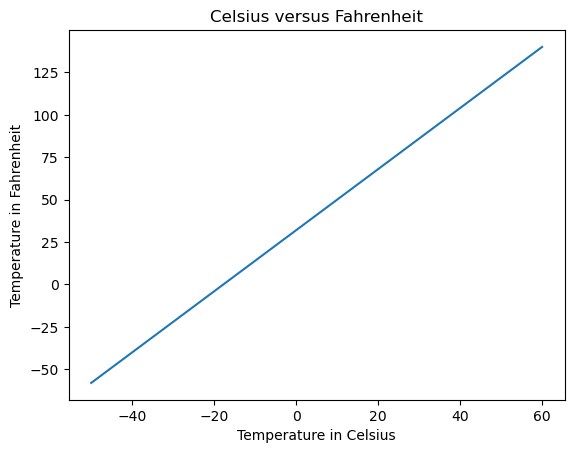

In [14]:
temperature_df = pd.read_csv('../data/raw/celsius_to_fahrenheit.csv')
print(temperature_df.shape)

plt.plot(temperature_df['Celsius'], temperature_df['Fahrenheit'])
plt.title("Celsius versus Fahrenheit")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Temperature in Fahrenheit")
plt.show()

In [15]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


Using Pandas' `info` function we can check that we have no null values. Other than that, the Celsius variable is of integer type as there were no real values among our random Celsius temperatures. Fahrenheit temperatures, on the other hand, are not discrete. Thus, the Fahrenheit variable is of float type.

Pandas' `describe` function returns summary statistics about the data. These statistics allow us to understand that degrees Fahrenheit are more extreme than degrees Celsius and usually have larger magnitudes.

In [16]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [17]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


## Model Building and Training

TensorFlow API can easily create an Adaline model. As we have only a single stream having a single layer, we can use the `Sequential` model framework. Only one layer having only one neuron is added to this single stream.

We can apply this simple model to the problem because there is a perfect linear correlation between both variables. In other words, the data is linearly separable.

We want to be able to predict a temperature in Fahrenheit based on a temperature in Celsius, so we need our Adaline to act as a linear regressor. For this reason, we do not add any activation function to our model.

Lacking an activation function, there is no threshold for our model and its weights are updated directly using the error calculated from the output of the neuron. This is what makes our model an Adaline instead of a Perceptron.

In [18]:
adaline_regressor = tf.keras.models.Sequential()
adaline_regressor.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
adaline_regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


For training our model we will use the entire dataset. Since we already know the formula for converting degrees Celsius to degrees Fahrenheit, we can check the model coefficients directly to check if it is correct. There is no need to calculate performance metrics on a testing set.

An early stopping callback is instantiated to help our model converge better without the need to worry about number of epochs, which is set to be a very large value.

The simplicity of the task makes it possible to use a large learning rate of 0.1. Using this learning rate, the model trains faster and we do not need to worry about local minimas or "jumping over" the global minima.

We want to interpret the model coefficients directly. Therefore, we cannot normalize the data as it would also change the coefficients.

In [19]:
# No train/test split since we can evaluate model coefficients directly.
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

# Patience set to 10 was enough to let our model converge in all tests.
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                           patience=10)

# Largest feasible learning rate to train faster.
adaline_regressor.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
                             loss='mean_squared_error')

# Enough epochs to let the early stopping callback work.
training_epochs = adaline_regressor.fit(X_train, y_train, epochs=2000,
                                           callbacks=[early_stopping_callback])

Epoch 1/2000
1/1 [==============================] - 0s 999us/step - loss: 1968.1841
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 1827.6063
Epoch 3/2000
1/1 [==============================] - 0s 2ms/step - loss: 1697.5641
Epoch 4/2000
1/1 [==============================] - 0s 1000us/step - loss: 1578.2057
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 1469.6248
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 1371.8453
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 1284.8110
Epoch 8/2000
1/1 [==============================] - 0s 999us/step - loss: 1208.3763
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 1142.2925
Epoch 10/2000
1/1 [==============================] - 0s 1ms/step - loss: 1086.1981
Epoch 11/2000
1/1 [==============================] - 0s 1ms/step - loss: 1039.6124
Epoch 12/2000
1/1 [==============================] - 0s 999us/step - loss: 1001.9301
Epoc

Loss progression in the plot below clearly indicates that our model is capable of becoming fully converged around epoch 600.

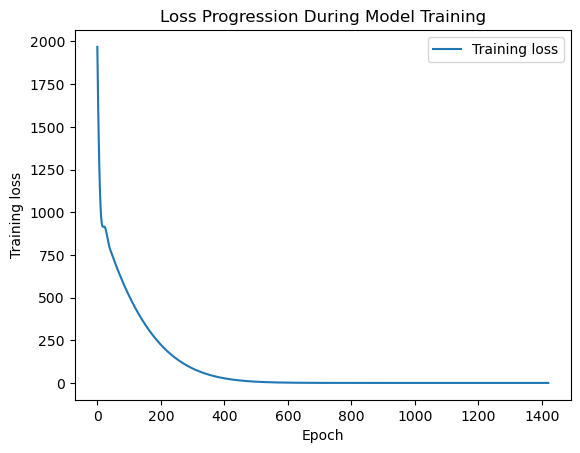

In [20]:
plt.plot(training_epochs.history['loss'])
plt.title("Loss Progression During Model Training")
plt.xlabel("Epoch")
plt.ylabel("Training loss")
plt.legend(["Training loss"])
plt.show()

## Model Evaluation

The formula to convert degrees Celsius to degrees Fahrenheit is:

F = C * 1.8 + 32

The coeffiecients of our model are the same as those in the conversion formula, except for small precision errors.

By plotting our data and the regression line learned by the model, it becomes clear that the regression line follows the line created by the data points.

Adaline regressor weight:  [[1.8000002]]
Adaline regressor bias:  [31.999952]


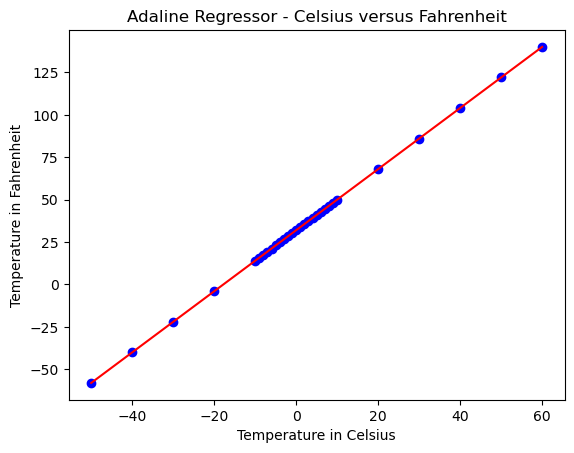

In [21]:
print("Adaline regressor weight: ", adaline_regressor.get_weights()[0])
print("Adaline regressor bias: ", adaline_regressor.get_weights()[1])

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, adaline_regressor.predict(X_train), color='r')
plt.title("Adaline Regressor - Celsius versus Fahrenheit")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Temperature in Fahrenheit")
plt.show()

Next, we instantiate a Scikit-learn linear regressor to compare to our model. This linear regressor performs an ordinary least squares optimization to find the best model coefficients.

The results are almost the same as those of our model:
1. Model coefficients equal to those of the conversion formula;
2. Regression line perfectly following the line created by the plotted data points.

Linear regression coefficient:  [[1.8]]
Linear regression intercept:  [32.]


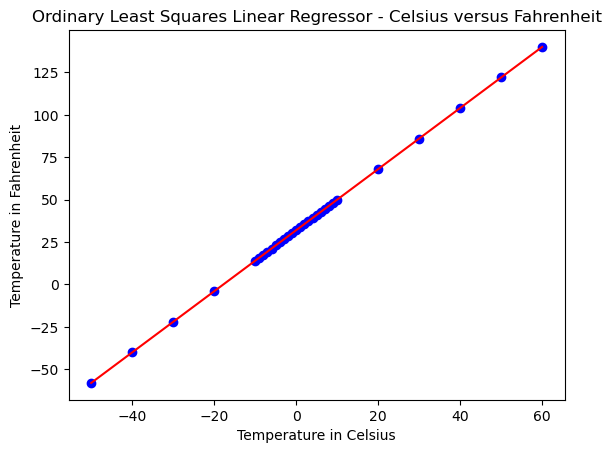

In [22]:
X_train_reshaped = X_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reshaped, y_train_reshaped)

print("Linear regression coefficient: ", linear_regressor.coef_)
print("Linear regression intercept: ", linear_regressor.intercept_)

plt.scatter(X_train, y_train, color='b')
plt.plot(X_train_reshaped, linear_regressor.predict(X_train_reshaped), color='r')
plt.title("Ordinary Least Squares Linear Regressor - Celsius versus Fahrenheit")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Temperature in Fahrenheit")
plt.show()

Lastly, we perform a last check by running our Adaline model, the Scikit-learn model and the actual conversion formula. The 3 returned values when converting 10 degrees Celsius to Fahrenheit are exactly the same, 50 degrees.

We can conclude that our model is perfectly able to learn the conversion formula and to predict degrees Fahrenheit given any degrees Celsius.

In [23]:
test_temperature_celsius = 10

print("Adaline regression predicted Fahrenheit: ",
      np.round(adaline_regressor.predict([[test_temperature_celsius]]), 2))
print("Ordinary least squares linear regression predicted Fahrenheit: ",
      np.round(linear_regressor.predict([[test_temperature_celsius]]), 2))
print("Actual Fahrenheit: ", (9 / 5) * test_temperature_celsius + 32)

Adaline regression predicted Fahrenheit:  [[50.]]
Ordinary least squares linear regression predicted Fahrenheit:  [[50.]]
Actual Fahrenheit:  50.0
